<h1 style='color:DarkBlue' align='center'> Regression & Trend Classification- SBI Stock price

**Our target here is to predict close price one day before.**

In [1]:
#import libraries
import pandas as pd
import quandl
import datetime as dt


In [2]:
# df=quandl.get("BSE/BOM500124", authtoken="db3AaM88USTLfqXXJg9E")
df_SBI=quandl.get("BSE/BOM500112", authtoken="db3AaM88USTLfqXXJg9E")

df=df_SBI

In [3]:
print(df.shape)
df.head()

(6235, 12)


,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1995-05-05,177.0,178.0,174.0,175.0,0.0,0.0,0.0,0.0,NaN,NaN,4.0,-2.0
1995-05-08,172.0,174.0,172.0,172.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
1995-05-09,174.0,174.0,170.0,172.0,0.0,0.0,0.0,0.0,NaN,NaN,4.0,-2.0
1995-05-10,171.0,172.0,170.0,171.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
1995-05-12,169.0,171.0,167.0,171.0,0.0,0.0,0.0,0.0,NaN,NaN,4.0,2.0


In [4]:
df1=df.drop(['WAP','No. of Shares','No. of Trades','Total Turnover','Deliverable Quantity','% Deli. Qty to Traded Qty'],axis=1)


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6235 entries, 1995-05-05 to 2020-07-13
Data columns (total 6 columns):
Open          6235 non-null float64
High          6235 non-null float64
Low           6235 non-null float64
Close         6235 non-null float64
Spread H-L    6235 non-null float64
Spread C-O    6235 non-null float64
dtypes: float64(6)
memory usage: 341.0 KB


In [6]:
df1.isnull().sum()

Open          0
High          0
Low           0
Close         0
Spread H-L    0
Spread C-O    0
dtype: int64

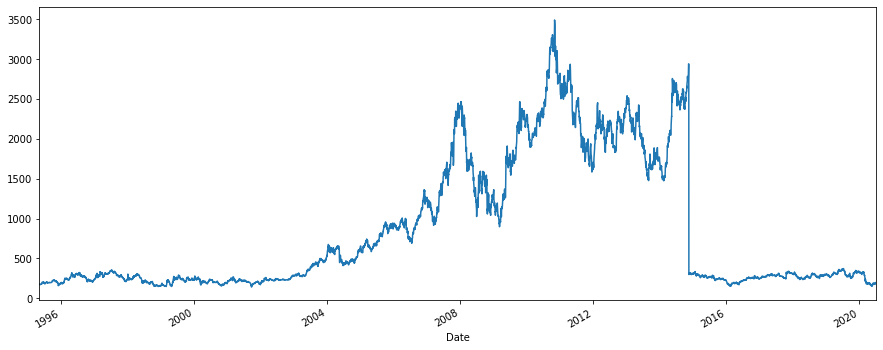

In [7]:
df['Close'].plot(figsize=(15,6))

In [8]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High']
low_prices = df.loc[:,'Low']
df1['mid_prices'] = (high_prices+low_prices)/2.0

In [9]:
#extracting date features
df1['month']=df1.index.month
df1['year']=df1.index.year
df1['dayofweek']=df1.index.dayofweek
df1['dayofyear']=df1.index.dayofyear
df1['quarter']=df1.index.quarter

In [10]:
df1.head()

,Open,High,Low,Close,Spread H-L,Spread C-O,mid_prices,month,year,dayofweek,dayofyear,quarter
Date,,,,,,,,,,,,
1995-05-05,177.0,178.0,174.0,175.0,4.0,-2.0,176.0,5,1995,4,125,2
1995-05-08,172.0,174.0,172.0,172.0,2.0,0.0,173.0,5,1995,0,128,2
1995-05-09,174.0,174.0,170.0,172.0,4.0,-2.0,172.0,5,1995,1,129,2
1995-05-10,171.0,172.0,170.0,171.0,2.0,0.0,171.0,5,1995,2,130,2
1995-05-12,169.0,171.0,167.0,171.0,4.0,2.0,169.0,5,1995,4,132,2


In [11]:
#defining moving avg creating new features
df1['sma60'] = df1['Close'].rolling(window=60, center=False).mean() 
df1['sma60std'] = df1['Close'].rolling(window=60, center=False).std()
# df1['sma30'] = df1['Close'].rolling(window=30, center=False).mean() 
# df1['sma30std'] = df1['Close'].rolling(window=30, center=False).std()
# df1['sma20'] = df1['Close'].rolling(window=20, center=False).mean() 
# df1['sma20std'] = df1['Close'].rolling(window=20, center=False).std()

df1['sma10'] = df1['Close'].rolling(window=10, center=False).mean() 
df1['sma10std'] = df1['Close'].rolling(window=10, center=False).std()

# df1['sma7'] = df1['Close'].rolling(window=6, center=False).mean() 
# df1['sma7std'] = df1['Close'].rolling(window=6, center=False).std()


In [12]:
#defining Target column
df1['1 day before close']=df1['Close'].shift(-1)

In [13]:
# df1=df1.drop('Close',axis=1)

Train -Test split

In [14]:
train=df1.iloc[:-30,:]
train=train.iloc[65:,[0,3,4,5,6,7,9,10,11,12,13,14,15,16]]

In [15]:
train.tail()

,Open,Close,Spread H-L,Spread C-O,mid_prices,month,dayofweek,dayofyear,quarter,sma60,sma60std,sma10,sma10std,1 day before close
Date,,,,,,,,,,,,,,
2020-05-26,153.0,151.40,3.00,-1.60,151.800,5,1,147,2,205.517500,49.159840,159.105,8.676419,158.60
2020-05-27,152.0,158.60,10.05,6.60,155.775,5,2,148,2,202.779167,47.040804,158.295,8.256528,158.30
2020-05-28,159.9,158.30,5.65,-1.60,159.625,5,3,149,2,199.974167,44.480449,156.715,6.135237,160.30
2020-05-29,156.0,160.30,6.45,4.30,158.625,5,4,150,2,197.175000,41.452718,155.950,4.939017,170.05
2020-06-01,164.0,170.05,7.80,6.05,167.350,6,0,153,2,194.643333,38.215213,156.315,5.848269,170.25


In [16]:
test=df1.iloc[-30:,[0,3,4,5,6,7,9,10,11,12,13,14,15,16]]

test.tail()

,Open,Close,Spread H-L,Spread C-O,mid_prices,month,dayofweek,dayofyear,quarter,sma60,sma60std,sma10,sma10std,1 day before close
Date,,,,,,,,,,,,,,
2020-07-07,187.75,188.55,5.05,0.80,186.575,7,1,189,3,176.758333,11.891309,184.375,3.244418,191.95
2020-07-08,188.55,191.95,8.85,3.40,192.975,7,2,190,3,176.829167,11.969988,185.110,4.036830,199.10
2020-07-09,192.50,199.10,8.40,6.60,196.700,7,3,191,3,177.088333,12.282237,186.495,5.992423,195.65
2020-07-10,198.00,195.65,7.50,-2.35,198.750,7,4,192,3,177.310833,12.497288,187.600,6.592883,192.60
2020-07-13,198.30,192.60,8.10,-5.70,195.700,7,0,195,3,177.377500,12.568994,188.930,6.051777,NaN


In [17]:
train.columns

Index(['Open', 'Close', 'Spread H-L', 'Spread C-O', 'mid_prices', 'month',
       'dayofweek', 'dayofyear', 'quarter', 'sma60', 'sma60std', 'sma10',
       'sma10std', '1 day before close'],
      dtype='object')

In [18]:
from pycaret.regression import *

In [19]:

reg = setup(data=train, target = '1 day before close',ignore_features=['Close'],
            categorical_features=['month', 'dayofweek', 'dayofyear', 'quarter'],
            normalize=True,session_id=1975)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1975
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(6140, 14)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [20]:
compare_models(blacklist = ['huber','tr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,15.7818,2328.92,37.5449,0.9966,0.0348,0.0209
1,Passive Aggressive Regressor,17.6913,2411.29,39.0076,0.9965,0.0433,0.0264
2,Extra Trees Regressor,17.1927,2511.89,40.4731,0.9964,0.0365,0.0221
3,Ridge Regression,18.7629,2537.77,41.0122,0.9963,0.0953,0.0311
4,Orthogonal Matching Pursuit,17.5308,2535.62,40.8736,0.9963,0.0863,0.027
5,Bayesian Ridge,18.7468,2536.34,40.9668,0.9963,0.091,0.031
6,Random Forest,17.0477,2546.78,40.5246,0.9963,0.0362,0.0217
7,CatBoost Regressor,19.8416,2659.84,42.6211,0.9961,0.0461,0.0279
8,Light Gradient Boosting Machine,18.1478,2764.54,43.451,0.996,0.0368,0.0224
9,Gradient Boosting Regressor,17.7767,2897.22,44.6892,0.9958,0.0384,0.0231


In [21]:
#Extra trees regresser chosen just for minimum RMSE
ET=create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.0633,811.5580,28.4879,0.9988,0.0241,0.0184
1,19.6942,16483.8691,128.3895,0.9758,0.1125,0.0383
2,15.7085,794.4500,28.1860,0.9989,0.0270,0.0193
3,14.5833,601.7991,24.5316,0.9992,0.0238,0.0179
4,16.6717,873.2967,29.5516,0.9988,0.0251,0.0189
5,15.0573,806.1366,28.3925,0.9988,0.0264,0.0189
6,14.8414,756.8289,27.5105,0.9990,0.0261,0.0190
7,14.6341,621.5748,24.9314,0.9991,0.0280,0.0195
8,15.2529,724.8542,26.9231,0.9990,0.0273,0.0185
9,16.3118,814.8360,28.5453,0.9987,0.0276,0.0203


In [22]:
predict_model(ET)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso,15.6647,777.2863,27.8799,0.9989,0.0261,0.0192


,Spread H-L,Spread C-O,mid_prices,sma60,sma60std,sma10std,month_1,month_10,month_11,month_12,...,dayofyear_96.0,dayofyear_97.0,dayofyear_98.0,dayofyear_99.0,quarter_1,quarter_2,quarter_3,quarter_4,1 day before close,Label
0,-0.090654,-0.787451,1.889156,1.751220,-0.011406,0.199233,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2477.25,2424.8390
1,-0.647784,-0.090242,-0.754269,-0.763674,-0.481746,-0.352385,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,238.75,236.2004
2,0.989465,1.866191,2.227542,2.148136,0.053141,0.580572,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2768.65,2748.2835
3,1.281221,0.875421,1.151381,0.998213,0.584245,0.629983,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1856.60,1838.9922
4,-0.040993,0.504606,0.082995,0.268714,0.305006,0.229948,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,947.95,943.4148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,-0.627609,-0.204191,-0.769430,-0.760414,-0.554704,-0.449339,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,218.25,222.0171
1839,0.083158,-0.831872,0.042685,0.033030,-0.328540,-0.270347,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,879.90,889.5495
1840,-0.230324,-0.364491,-0.296837,-0.314775,-0.381516,0.017237,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,627.40,613.4179
1841,-0.259810,-0.302688,-0.643028,-0.731626,-0.341052,-0.003289,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,317.50,326.1017


In [23]:
final_et=finalize_model(ET)

In [24]:
d=predict_model(estimator=final_et, data=test)
d.tail()

,Open,Close,Spread H-L,Spread C-O,mid_prices,month,dayofweek,dayofyear,quarter,sma60,sma60std,sma10,sma10std,1 day before close,Label
25,187.75,188.55,5.05,0.80,186.575,7,1,189,3,176.758333,11.891309,184.375,3.244418,191.95,188.5088
26,188.55,191.95,8.85,3.40,192.975,7,2,190,3,176.829167,11.969988,185.110,4.036830,199.10,196.5275
27,192.50,199.10,8.40,6.60,196.700,7,3,191,3,177.088333,12.282237,186.495,5.992423,195.65,201.9686
28,198.00,195.65,7.50,-2.35,198.750,7,4,192,3,177.310833,12.497288,187.600,6.592883,192.60,198.9663
29,198.30,192.60,8.10,-5.70,195.700,7,0,195,3,177.377500,12.568994,188.930,6.051777,NaN,194.1212


In [25]:
d[['Close','Label']].tail()

,Close,Label
25,188.55,188.5088
26,191.95,196.5275
27,199.10,201.9686
28,195.65,198.9663
29,192.60,194.1212


The label contains one day before predicted value for close i.e. for 28 no. close value we have predictecd 27 no Label value.

In [26]:
close=d.Close[1:]
prediction=d.Label.shift(1)[1:]

### As we are predicting price one day before thus we had shifted Label column 1 ahead to calculate actual RMSE 

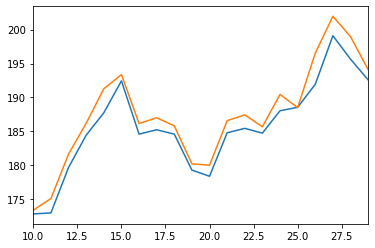

In [49]:
d.Close[-20:].plot()
d.Label[-20:].plot()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse=mean_squared_error(close,prediction)
import numpy as np
print('MSE=',mse)
rmse=np.sqrt(mse)
print('RMSE=',rmse)
MAE=sum(np.abs(prediction-close))/test.shape[0]
print('MAE=',MAE)

MSE= 25.262042449310364
RMSE= 5.026135936214854
MAE= 3.8138233333333336


## Above RMSE of 5.02 is actual prediction error

In [28]:
evaluate_model(ET)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [29]:
d['Trend']=np.where(d.Close > d.Close.shift(-1),0,1)

In [30]:
d['Predicted_Trend']=np.where(d.Label > d.Label.shift(-1),0,1)

In [31]:
d[['Close','Trend','Predicted_Trend']].tail()

,Close,Trend,Predicted_Trend
25,188.55,1,1
26,191.95,1,1
27,199.10,0,0
28,195.65,0,0
29,192.60,1,1


In [32]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(d.Trend, d.Predicted_Trend))

[[13  0]
 [ 1 16]]


In [33]:
accuracy = metrics.accuracy_score(d.Trend, d.Predicted_Trend)
accuracy

0.9666666666666667

In [34]:
print(metrics.classification_report(d.Trend, d.Predicted_Trend))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        17

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [35]:
save_model(ET,'Stock Reg &Trend Classification1')

Transformation Pipeline and Model Succesfully Saved


In [36]:
load_model('Stock Reg &Trend Classification1')

Transformation Pipeline and Model Sucessfully Loaded


[Pipeline(steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['month',
                                                             'dayofweek',
                                                             'dayofyear',
                                                             'quarter'],
                                       features_todrop=['Close'],
                                       ml_usecase='regression',
                                       target='1 day before close')),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels_in_TestData(r...
                                                   target='1 day before close')),
                 ('P_transform', Empty()), ('pt_target', Empty()),
                 ('binn', 

In [37]:
df_SBI=quandl.get("BSE/BOM500112", authtoken="db3AaM88USTLfqXXJg9E")

df2=df_SBI

In [38]:
df3=df2.iloc[:,:]

df4=df3.drop(['WAP','No. of Shares','No. of Trades','Total Turnover','Deliverable Quantity','% Deli. Qty to Traded Qty'],axis=1)

In [39]:
# df4=df4.append([{'df4.idx':'2020-07-14',Open':192.30,'High':192.30,'Low':184.60,'Close':186.05,'Spread H-L':7.7,'Spread C-O':6.25}])
# # df4.tail(2)

In [40]:
df4.tail(2)

,Open,High,Low,Close,Spread H-L,Spread C-O
Date,,,,,,
2020-07-10,198.0,202.50,195.00,195.65,7.5,-2.35
2020-07-13,198.3,199.75,191.65,192.60,8.1,-5.70


In [41]:
# First calculate the mid prices from the highest and lowest
high_prices = df4.loc[:,'High']
low_prices = df4.loc[:,'Low']
df4['mid_prices'] = (high_prices+low_prices)/2.0

In [42]:
df4['month']=df4.index.month
df4['year']=df4.index.year
df4['dayofweek']=df4.index.dayofweek
df4['dayofyear']=df4.index.dayofyear
df4['quarter']=df4.index.quarter

In [43]:
#defining moving avg creating new features
df4['sma60'] = df4['Close'].rolling(window=60, center=False).mean() 
df4['sma60std'] = df4['Close'].rolling(window=60, center=False).std()


df4['sma10'] = df4['Close'].rolling(window=10, center=False).mean() 
df4['sma10std'] = df4['Close'].rolling(window=10, center=False).std()

In [44]:
#defining Target column
df4['1 day before close']=df4['Close'].shift(-1)

In [45]:
test=df4.iloc[-30:,[0,3,4,5,6,7,9,10,11,12,13,14,15,16]]
test.replace([test['Close']],0, inplace=True)
test.tail()

,Open,Close,Spread H-L,Spread C-O,mid_prices,month,dayofweek,dayofyear,quarter,sma60,sma60std,sma10,sma10std,1 day before close
Date,,,,,,,,,,,,,,
2020-07-07,0.0,0.0,5.05,0.80,186.575,7,1,189,3,176.758333,11.891309,184.375,3.244418,0.0
2020-07-08,0.0,0.0,8.85,3.40,192.975,7,2,190,3,176.829167,11.969988,185.110,4.036830,0.0
2020-07-09,192.5,0.0,8.40,6.60,196.700,7,3,191,3,177.088333,12.282237,186.495,5.992423,0.0
2020-07-10,198.0,0.0,7.50,-2.35,198.750,7,4,192,3,177.310833,12.497288,187.600,6.592883,0.0
2020-07-13,198.3,0.0,8.10,-5.70,195.700,7,0,195,3,177.377500,12.568994,188.930,6.051777,NaN


In [50]:
model=load_model('Stock Reg &Trend Classification')

prediction_df=predict_model(estimator=model, data=test)
prediction_df['Trend']=np.where(df4.Close[-30:] > df4.Close[-30:].shift(-1),0,1)
prediction_df['Predicted_Trend']=np.where(prediction_df.Label > prediction_df.Label.shift(-1),0,1)
# prediction_df['Predicted_Trend']=(prediction_df['Predicted_Trend'].shift(1))
prediction_df[['Close','Label','Trend','Predicted_Trend']].tail(10)

,Close,Label,Trend,Predicted_Trend
20,0.0,180.2056,1,1
21,0.0,186.9139,1,1
22,0.0,187.6696,0,0
23,0.0,2.4770,1,1
24,0.0,190.7234,1,0
25,0.0,188.7502,1,1
26,0.0,196.8400,1,1
27,0.0,202.3340,0,0
28,0.0,199.1675,0,0
29,0.0,194.2675,1,1


In [47]:
prediction_df=prediction_df.iloc[-29:,:]
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(prediction_df.Trend, prediction_df.Predicted_Trend))

[[13  0]
 [ 1 15]]


In [48]:
df2.Close.tail()

Date
2020-07-07    188.55
2020-07-08    191.95
2020-07-09    199.10
2020-07-10    195.65
2020-07-13    192.60
Name: Close, dtype: float64